In [1]:
import os
os.getcwd()

'/tmp/08cc2917-bc01-4021-b845-1da7c00c6e88'

In [2]:
os.chdir('/home/lazafi/labor/ml-2019/male2019/3/src/fruits')
os.getcwd()

'/home/lazafi/labor/ml-2019/male2019/3/src/fruits'

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import tensorflow as tf
from PIL import Image
from glob import glob
import csv
import seaborn as sn
import pandas as pd

#from tqdm import tqdm

from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

from helper import *
from bov.Bag import BOV



## Feature Variables

### Pixel Data

Images are read as 3-tupples of color values. We use cv2 library for reading images and to convert them in rgb arrays.  Color values are then standartized.

In [4]:
# read is limited to 2 files from 2 subdirecories
fruit2data = FIDS30DataSet("/home/lazafi/labor/ml-2019/male2019/3/data/FIDS30", limit=2)
# TODO: why hangs
#fruit2data.addFeatures(Pixel())
#print(fruit2data.x_data)

 category strawberries 2
 category apples 2


### Histogram

From the pixel data we extracted color histograms. For the color images we count the occurances for each 256 colors in each of the 3 channels seperatelly and concat them to a long histogram of 768 colors. We also provide the option to reduce the histogram to the given amount of bins.


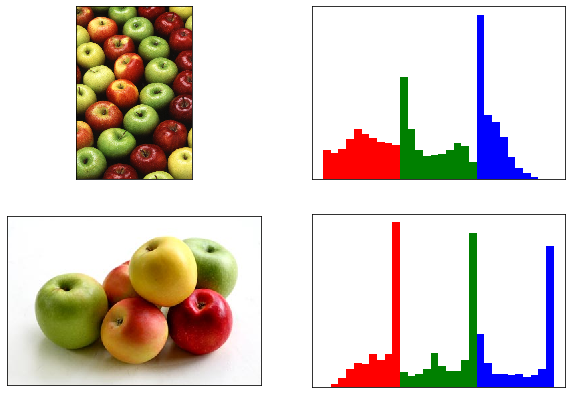

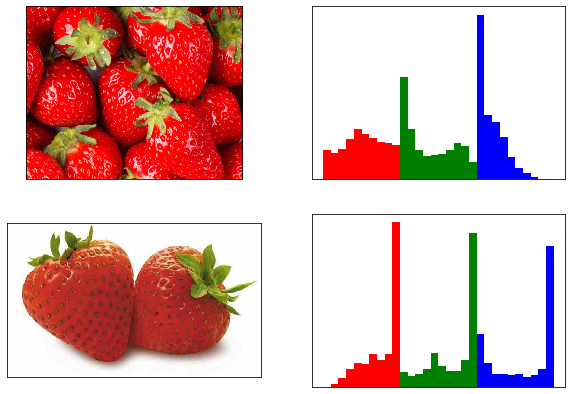

In [5]:
# we only use 10 bins per color channel
fruit2data.resetFeatures()
fruit2data.addFeatures(Histogram(10, debug=True))


### Visual Bag of Words

We use BOV to describe features of images. 

TODO: explain method used
TODO: show something


In [6]:
fruit2data.resetFeatures()
#fruit2data.addFeatures(BOV(10, debug = True))
fruit2data.addFeatures(BOV(10, debug = False))

Computing Features for apples
Computing Features for strawberries
Vocabulary Histogram Generated


## FIDS30 Fruits Dataset


In [7]:
# prepare the fids30 dataset with histogram features
fids30_data = FIDS30DataSet("/home/lazafi/labor/ml-2019/male2019/3/data/FIDS30", 10)
fids30_data.addFeatures(Histogram(50))
print(fids30_data.count)

 category strawberries 10
 category apples 10
 category raspberries 10
 category mangos 10
 category avocados 10
 category coconuts 10
 category apricots 10
 category grapefruits 10
 category watermelons 10
90


In [8]:
print(fids30_data.labels)

['strawberries', 'apples', 'raspberries', 'mangos', 'avocados', 'coconuts', 'apricots', 'grapefruits', 'watermelons']


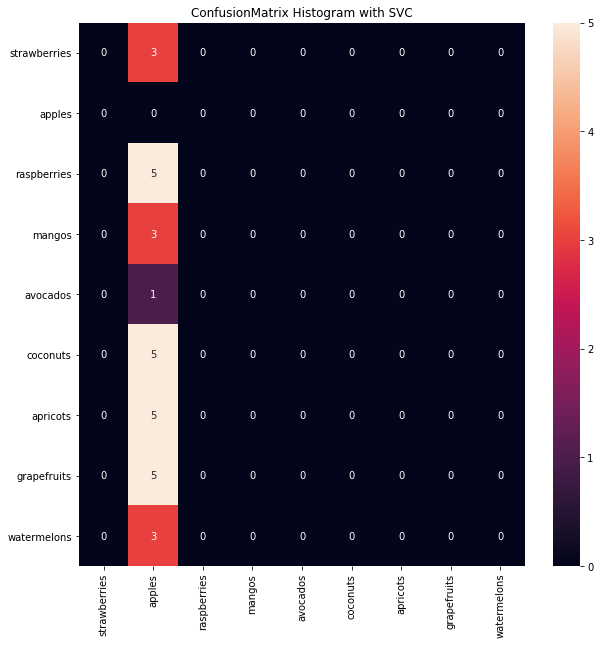

In [9]:
# svc

exp1 = Experiment(fids30_data, svm.SVC(gamma='auto'), "Histogram with SVC")
exp1.train()
exp1.evaluate(figure=True)


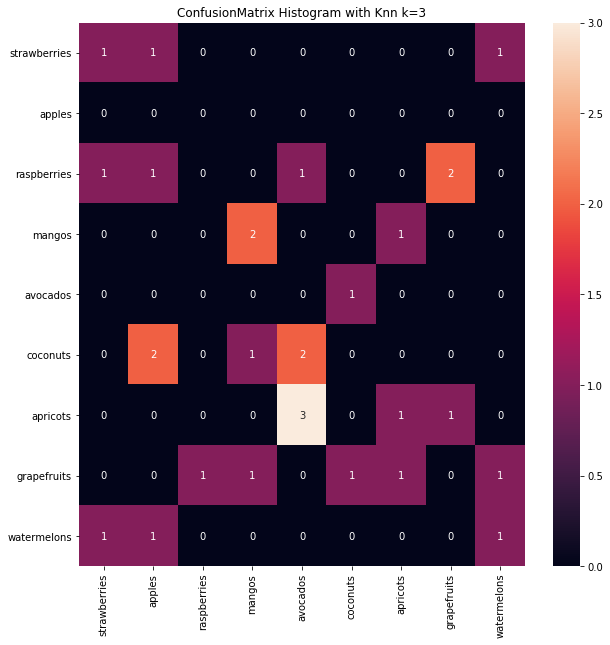

classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance'):
              precision    recall  f1-score   support

           0       0.33      0.33      0.33         3
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         5
           3       0.50      0.67      0.57         3
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         5
           6       0.33      0.20      0.25         5
           7       0.00      0.00      0.00         5
           8       0.33      0.33      0.33         3

    accuracy                           0.17        30
   macro avg       0.17      0.17      0.17        30
weighted avg       0.17      0.17      0.17        30




/home/lazafi/labor/ml-2019/male2019/3/env/lib/python3.5/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [10]:
# knn
exp1 = Experiment(fids30_data, KNeighborsClassifier(n_neighbors=3, weights = 'distance'),  "Histogram with Knn k=3")
exp1.train()
exp1.evaluate(figure=True, text=True)



/home/lazafi/labor/ml-2019/male2019/3/env/lib/python3.5/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lazafi/labor/ml-2019/male2019/3/env/lib/python3.5/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lazafi/labor/ml-2019/male2019/3/env/lib/python3.5/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lazafi/labor/ml-2019/male2019/3/env/lib/python3.5/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted 

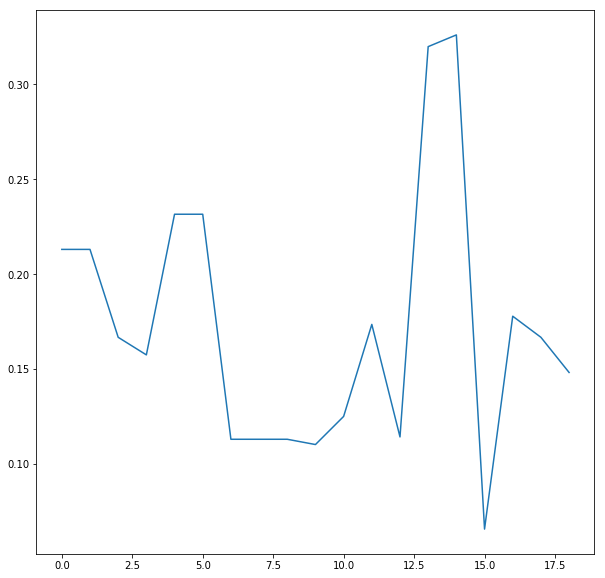

In [11]:
score = []
for k in range(1, 20):
    #print(k)
    classifier = KNeighborsClassifier(n_neighbors=k, weights = 'distance')
    classifier.fit(exp1.x_train, exp1.y_train)
    predicted = classifier.predict(exp1.x_test)
    #print(predicted)
    #print(exp1.y_test)
    score.append(metrics.precision_score(exp1.y_test, predicted, average='macro'))
plt.figure(figsize=(10,10))
plt.plot(score)
plt.show()

/home/lazafi/labor/ml-2019/male2019/3/env/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


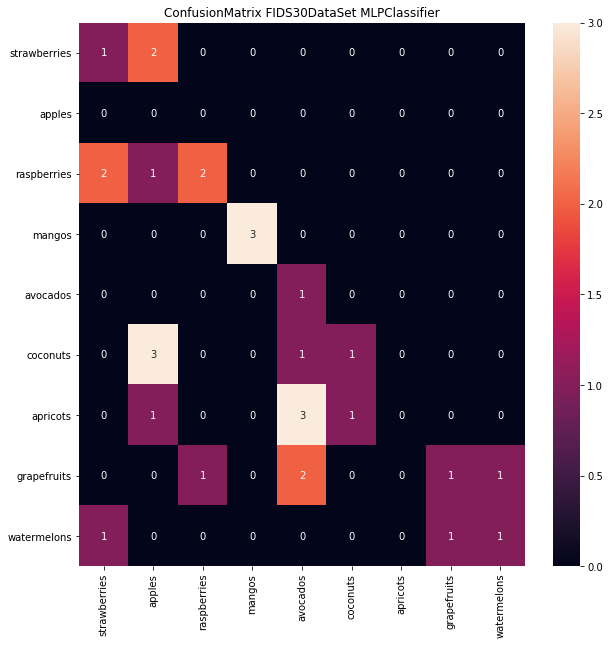

In [12]:

# mlp
exp1 = Experiment(fids30_data,  MLPClassifier())
exp1.train()
exp1.evaluate(figure=True)


In [13]:
exp1.evaluate(text=True)

classifier MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False):
              precision    recall  f1-score   support

           0       0.25      0.33      0.29         3
           1       0.00      0.00      0.00         0
           2       0.67      0.40      0.50         5
           3       1.00      1.00      1.00         3
           4       0.14      1.00      0.25         1
           5       0.50      0.20      0.29         5
           6       0.00      0.00      0.00         5
           7       0.50      0.20      0.29         5
    

/home/lazafi/labor/ml-2019/male2019/3/env/lib/python3.5/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lazafi/labor/ml-2019/male2019/3/env/lib/python3.5/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [14]:
# prepare dataset with bov features
fids30_data.resetFeatures()
fids30_data.addFeatures(BOV(50))


Computing Features for apples
Computing Features for raspberries
Computing Features for strawberries
Computing Features for coconuts
Computing Features for grapefruits
Computing Features for mangos
Computing Features for apricots
Computing Features for avocados
Computing Features for watermelons
Vocabulary Histogram Generated


/home/lazafi/labor/ml-2019/male2019/3/env/lib/python3.5/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


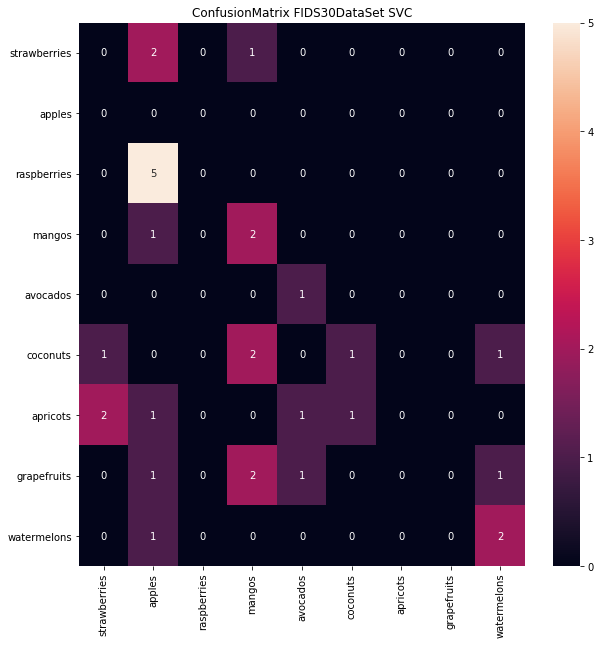

In [15]:

# svc
exp1 = Experiment(fids30_data,  svm.SVC())
exp1.train()
exp1.evaluate(figure=True)


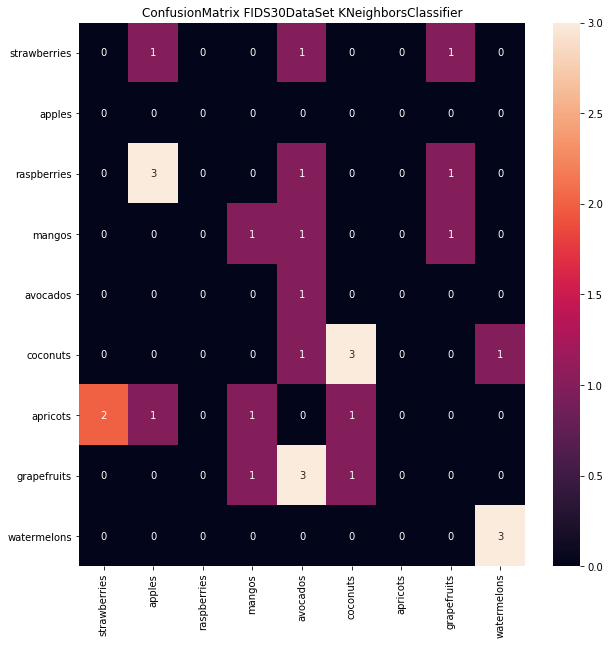

In [16]:

# knn
exp1 = Experiment(fids30_data, KNeighborsClassifier(n_neighbors=3, weights = 'distance'))
exp1.train()
exp1.evaluate(figure=True)


/home/lazafi/labor/ml-2019/male2019/3/env/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


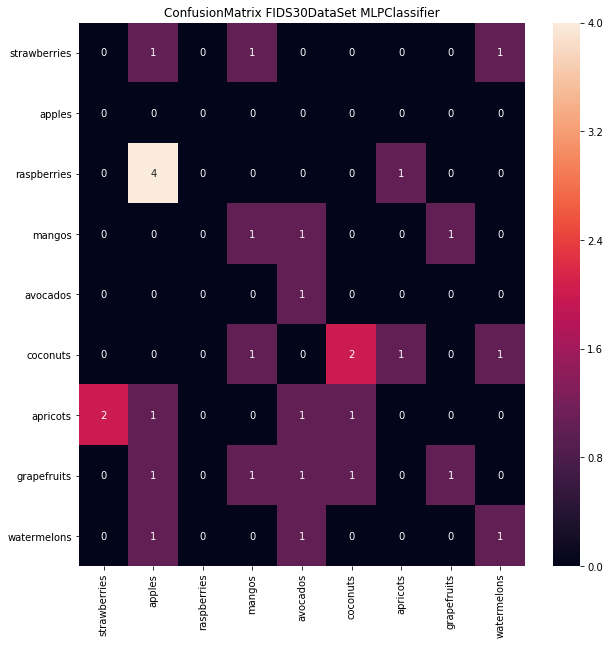

In [17]:

# mlp
exp1 = Experiment(fids30_data,  MLPClassifier())
exp1.train()
exp1.evaluate(figure=True)


In [18]:
# prepare the car dataset with histogram features
#datapath = "/home/lazafi/labor/ml-2019/male2019/3/data/CarData"
car_data = CarDataSet()
car_data.loadImages("/home/lazafi/labor/ml-2019/male2019/3/data/CarData/TrainImages")
car_data.loadImages("/home/lazafi/labor/ml-2019/male2019/3/data/CarData/TestImages", "neg")
print(car_data.count)


neg: /home/lazafi/labor/ml-2019/male2019/3/data/CarData/TrainImages/neg-212.pgm (40, 100)
pos: /home/lazafi/labor/ml-2019/male2019/3/data/CarData/TrainImages/pos-55.pgm (40, 100)
neg: /home/lazafi/labor/ml-2019/male2019/3/data/CarData/TrainImages/neg-125.pgm (40, 100)
pos: /home/lazafi/labor/ml-2019/male2019/3/data/CarData/TrainImages/pos-41.pgm (40, 100)
neg: /home/lazafi/labor/ml-2019/male2019/3/data/CarData/TrainImages/neg-482.pgm (40, 100)
neg: /home/lazafi/labor/ml-2019/male2019/3/data/CarData/TrainImages/neg-251.pgm (40, 100)
pos: /home/lazafi/labor/ml-2019/male2019/3/data/CarData/TrainImages/pos-98.pgm (40, 100)
neg: /home/lazafi/labor/ml-2019/male2019/3/data/CarData/TrainImages/neg-351.pgm (40, 100)
pos: /home/lazafi/labor/ml-2019/male2019/3/data/CarData/TrainImages/pos-305.pgm (40, 100)
neg: /home/lazafi/labor/ml-2019/male2019/3/data/CarData/TrainImages/neg-184.pgm (40, 100)
neg: /home/lazafi/labor/ml-2019/male2019/3/data/CarData/TrainImages/neg-144.pgm (40, 100)
neg: /home/la

neg: /home/lazafi/labor/ml-2019/male2019/3/data/CarData/TrainImages/neg-299.pgm (40, 100)
pos: /home/lazafi/labor/ml-2019/male2019/3/data/CarData/TrainImages/pos-25.pgm (40, 100)
pos: /home/lazafi/labor/ml-2019/male2019/3/data/CarData/TrainImages/pos-38.pgm (40, 100)
pos: /home/lazafi/labor/ml-2019/male2019/3/data/CarData/TrainImages/pos-115.pgm (40, 100)
neg: /home/lazafi/labor/ml-2019/male2019/3/data/CarData/TrainImages/neg-408.pgm (40, 100)
neg: /home/lazafi/labor/ml-2019/male2019/3/data/CarData/TrainImages/neg-349.pgm (40, 100)
pos: /home/lazafi/labor/ml-2019/male2019/3/data/CarData/TrainImages/pos-489.pgm (40, 100)
neg: /home/lazafi/labor/ml-2019/male2019/3/data/CarData/TrainImages/neg-254.pgm (40, 100)
pos: /home/lazafi/labor/ml-2019/male2019/3/data/CarData/TrainImages/pos-435.pgm (40, 100)
pos: /home/lazafi/labor/ml-2019/male2019/3/data/CarData/TrainImages/pos-387.pgm (40, 100)
neg: /home/lazafi/labor/ml-2019/male2019/3/data/CarData/TrainImages/neg-421.pgm (40, 100)
neg: /home/l

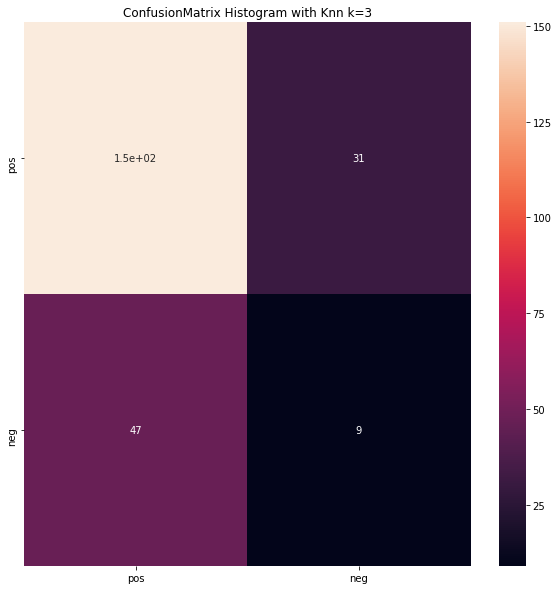

In [19]:
car_data.addFeatures(Histogram(10))

# knn
exp1 = Experiment(car_data, KNeighborsClassifier(n_neighbors=3, weights = 'distance'),  "Histogram with Knn k=3")
exp1.train()
exp1.evaluate(figure=True)


In [20]:
exp1.evaluate(text=True)

classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance'):
              precision    recall  f1-score   support

           0       0.76      0.83      0.79       182
           1       0.23      0.16      0.19        56

    accuracy                           0.67       238
   macro avg       0.49      0.50      0.49       238
weighted avg       0.64      0.67      0.65       238


